### Importing libraries and dataset

In [93]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [94]:
#Retrieving the dataset
df = pd.read_csv("sample_data/Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Dataset Preprocessing

Converting the Date column to appropriate Datetime Format

In [95]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Check the data for any missing values. Looks like we do not have any missing values in our dataset.

In [96]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Let us split the dataset into day, month and year and add these new rows to the dataframe

In [97]:
df.insert(2, 'Day', pd.DatetimeIndex(df.Date).day)
df.insert(3, 'Month', pd.DatetimeIndex(df.Date).month)
df.insert(4, 'Year', pd.DatetimeIndex(df.Date).year)
df.head()

,Store,Date,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,2,5,2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,2,12,2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,19,2,2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,26,2,2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,3,5,2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Sales Forecasting Using Different Types of Regression

#### What is Regression?
1.   Regression analysis is the process of estimating the relationship between a dependent or target variable (Weekly Sales in our case) and one or more independent variables (Temperature, CPI, Unemployment Rate, etc. in our case).
2.   The dependent variable is often called the outcome variable and the independent variables are often called predictors, covariates or features.
3.   Some of the main types of regression models are linear regression, polynomial regression, random forest regression (ensemble method that combines outputs of many regression models to produced informed results), logistic regression, lasso regression.

In this project, we will study how different types of regression models produce forecast for the Walmart Sales data.<br><br>

We have already preprocessed data and most of the data is already in its proper format. We need to perform outlier detection and removal, because regression is particularly sensitive to outliers.

### Outlier Detection and Removal

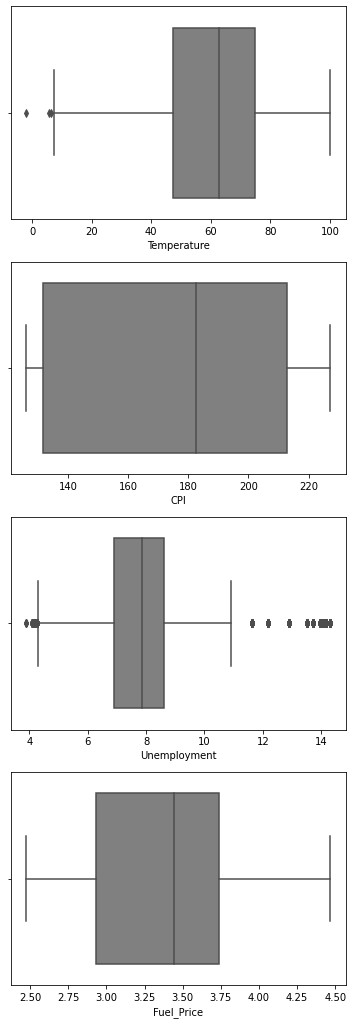

In [98]:
fig, axes = plt.subplots(4, figsize=(6, 18))
x = df[['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']]
for i, col in enumerate(x):
  sns.boxplot(df[col], ax=axes[i], color="grey")

Looks like we have some outliers that can confuse the regression model. We will get rid of them.

In [99]:
df = df[(df['Temperature']>10) & (df['Unemployment']<10) & (df['Unemployment']>4.5)]

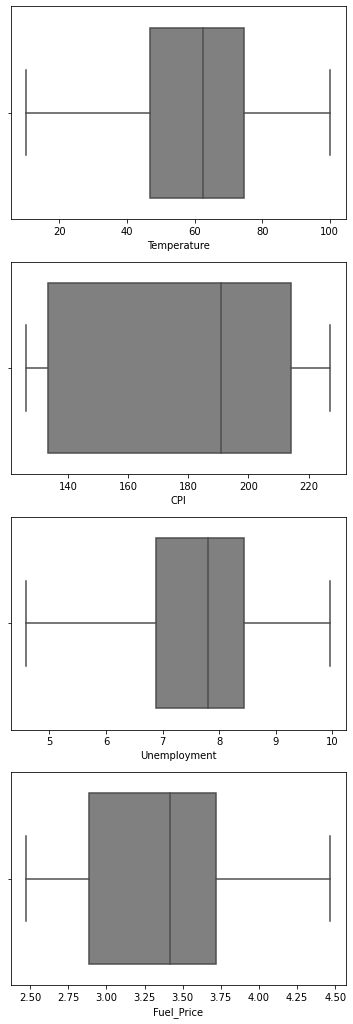

In [100]:
fig, axes = plt.subplots(4, figsize=(6, 18))
x = df[['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']]
for i, col in enumerate(x):
  sns.boxplot(df[col], ax=axes[i], color="grey")

Now that we have eliminated all the outliers we are ready to perform regression modeling using various regression techniques mentioned below - 


1.   Linear Regression
2.   Random Forest Regression
3.   Support Vector Regression
4.   Lasso Regression
5.   KNN Regressor
6.   Decision Tree Regressor
7.   Gradiant Boosting Regressor
8.   Extra Trees Regressor

We will also explore the use of Long Short Term Memory (LSTMs) Neural Networks for time series prediction.


### Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [102]:
x = df[["Store","Temperature", "Fuel_Price", "CPI", "Unemployment", "Day", "Month", "Year"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 13.0%
Mean Absolute Error: 455087.83502980677
Mean Squared Error: 297124253184.87634
Root Mean Squared Error: 545091.0503621174


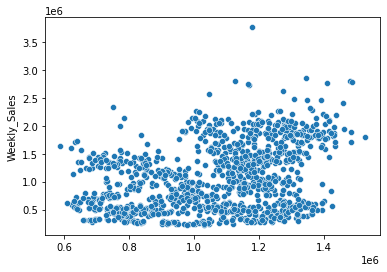

In [103]:
model = LinearRegression()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [105]:
x = df[["Store","Temperature", "Fuel_Price", "CPI", "Unemployment", "Day", "Month", "Year"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 99.0%
Mean Absolute Error: 275602.26829125383
Mean Squared Error: 264256707878.8771
Root Mean Squared Error: 514059.050964845


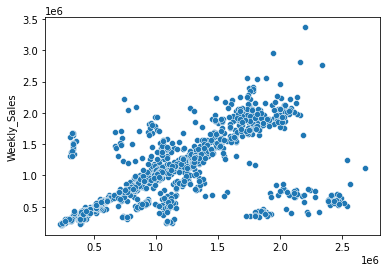

In [106]:
model = RandomForestRegressor(n_estimators=400, max_depth=15, n_jobs=5)
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

We clearly see that accuracy increases substantially after using a Random Forest Regression. The Error Values have also reduced significantly. This seems like a good fit for the data but overfitting might be a problem here. We will limit our accuracy threshold from 91-95%.

### Support Vector Regression

In [107]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [108]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - -3.0%
Mean Absolute Error: 469081.1223978424
Mean Squared Error: 325194797987.52216
Root Mean Squared Error: 570258.536093518


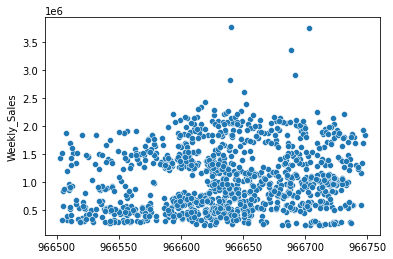

In [109]:
model = SVR('rbf')
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### Lasso Regression

In [110]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [111]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 1.0%
Mean Absolute Error: 496716.27767565206
Mean Squared Error: 342513792864.5422
Root Mean Squared Error: 585246.779456788


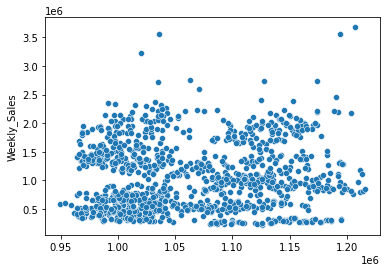

In [112]:
model = Lasso()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### KNN Regressor

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [114]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 42.0%
Mean Absolute Error: 454605.49288427556
Mean Squared Error: 336483553604.943
Root Mean Squared Error: 580072.0244977713


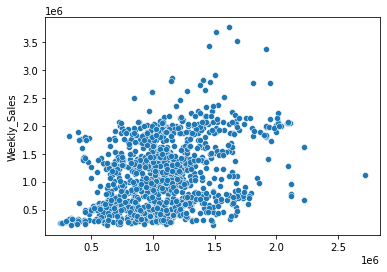

In [115]:
model = KNeighborsRegressor(n_neighbors=4, n_jobs=4)
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### Decision Tree Regressor

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [117]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 87.0%
Mean Absolute Error: 467212.78637514723
Mean Squared Error: 489386771780.15546
Root Mean Squared Error: 699561.8427131053


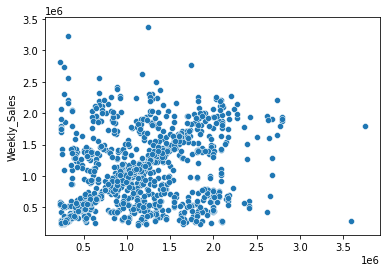

In [118]:
model = DecisionTreeRegressor(criterion='mse', random_state=0)
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### Gradiant Boosting *Regressor*

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [120]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 29.0%
Mean Absolute Error: 443549.33305665175
Mean Squared Error: 291198191209.32965
Root Mean Squared Error: 539627.8265706187


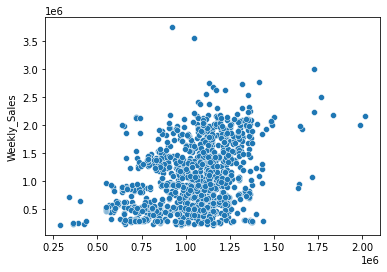

In [121]:
model = GradientBoostingRegressor()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### Extra Trees Regressor

In [122]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [123]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 86.0%
Mean Absolute Error: 393414.1614261926
Mean Squared Error: 271715498280.90582
Root Mean Squared Error: 521263.3674841402


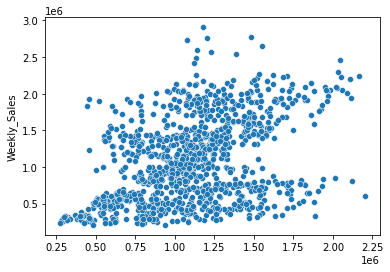

In [124]:
model = ExtraTreesRegressor()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

### Multivariate Time Series Forecasting with LSTMs Keras

#### We need to perform store wise prediction here because the time series for each store will be different based on the location and the population of the area where the store is situated. We will start just with store number 1 and eventually can think about performing the same for the other stores as well

In [125]:
df = df.loc[df["Store"] == 1]

Setting the date as index for the data

In [126]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.iloc["2010-05-02"]

,Store,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,,,
2010-05-02,1,2,5,2010,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,2,12,2010,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,19,2,2010,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,26,2,2010,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,3,5,2010,1554806.68,0,46.50,2.625,211.350143,8.106


Plotting the graph for each variable


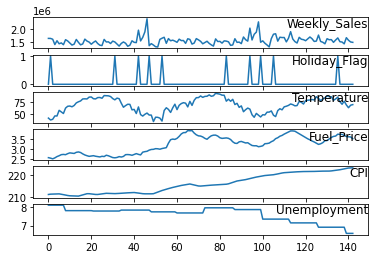

In [132]:
plt.figure()
j = 1
for i, col in enumerate(df.columns[4:]):
  plt.subplot(len(df.columns[4:]), 1, j)
  plt.plot(df.values[:, i+4])
  plt.title(df.columns[i+4], y=0.5, loc='right')
  j += 1
plt.show()

The Store, Day, Month and Year are not that useful to us now since we are taking only a single store and the date index, so, we will remove them.

In [133]:
df.pop('Day')
df.pop('Month')
df.pop('Year')
df.pop('Store')

Date
2010-05-02    1
2010-12-02    1
2010-02-19    1
2010-02-26    1
2010-05-03    1
             ..
2012-09-28    1
2012-05-10    1
2012-12-10    1
2012-10-19    1
2012-10-26    1
Name: Store, Length: 143, dtype: int64

Let us split the data into train and test

In [172]:
X = df[df.columns[1:5]]
Y = df["Weekly_Sales"]

In [173]:
X_train = X.loc[X.index[:int(len(X.index)*0.8)]]
train_index = X_train.index
X_train = np.array(X_train)
X_test = X.loc[X.index[int(len(X.index)*0.8):]]
test_index = X_test.index
X_test = np.array(X_test)

In [181]:
Y_train = np.array(Y.loc[Y.index[:int(len(Y.index)*0.8)]])
Y_test = np.array(Y.loc[Y.index[int(len(Y.index)*0.8):]])

In [192]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [193]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((114, 1, 4), (114,), (29, 1, 4), (29,))

Designing Our Long Short Term Memory (LSTM)

In [194]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [215]:
# Constructing the LSTM
model = Sequential()
model.add(LSTM(50, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [216]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                11000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________


In [217]:
# Training the Constructed LSTM
history = model.fit(X_train, Y_train, epochs=100, batch_size=52, validation_data=(X_test, Y_test), verbose=2, shuffle=False)

Epoch 1/100
3/3 - 0s - loss: 1551089.1250 - val_loss: 1571676.0000
Epoch 2/100
3/3 - 0s - loss: 1551089.0000 - val_loss: 1571675.8750
Epoch 3/100
3/3 - 0s - loss: 1551088.8750 - val_loss: 1571675.7500
Epoch 4/100
3/3 - 0s - loss: 1551088.8750 - val_loss: 1571675.7500
Epoch 5/100
3/3 - 0s - loss: 1551088.5000 - val_loss: 1571675.6250
Epoch 6/100
3/3 - 0s - loss: 1551088.5000 - val_loss: 1571675.2500
Epoch 7/100
3/3 - 0s - loss: 1551088.5000 - val_loss: 1571675.2500
Epoch 8/100
3/3 - 0s - loss: 1551088.2500 - val_loss: 1571675.0000
Epoch 9/100
3/3 - 0s - loss: 1551088.2500 - val_loss: 1571674.7500
Epoch 10/100
3/3 - 0s - loss: 1551087.8750 - val_loss: 1571674.7500
Epoch 11/100
3/3 - 0s - loss: 1551087.7500 - val_loss: 1571674.6250
Epoch 12/100
3/3 - 0s - loss: 1551087.6250 - val_loss: 1571674.3750
Epoch 13/100
3/3 - 0s - loss: 1551087.2500 - val_loss: 1571674.3750
Epoch 14/100
3/3 - 0s - loss: 1551087.1250 - val_loss: 1571674.1250
Epoch 15/100
3/3 - 0s - loss: 1551087.0000 - val_loss: 15

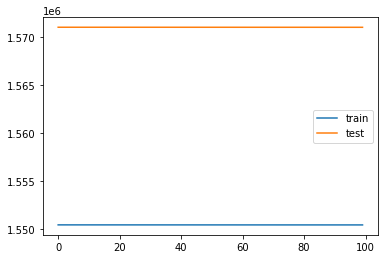

In [209]:
# Plot the training process
plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='test')
plt.legend()
plt.show()

The LSTM does not reduce the prediction loss as much as the regressors and hence, we cannot use it for forecasting the store sales. The reason for this might be lack of enough data. Neural networks are generall used

### Results

<table border=1><tr> <th> Regression Model </th> <th> Accuracy </th> <th> Mean Absolute Error </th> <th> Mean Square Error </th> <th> Root Mean Square Error </th></tr><tr> <td>Linear Regression</td> <td>13.0%</td><td>455087.83</td><td>297124253184.87</td><td>545091.05</td></tr><tr> <td>Random Forest Regression</td> <td>99.0%</td><td>275602.26</td><td>264256707878.88</td><td>514059.05</td></tr><tr> <td>Support Vector Regression</td> <td>-3.0%</td><td>469081.12</td><td>325194797987.52</td><td>570258.54</td></tr><tr> <td>Lasso Regression</td> <td>1.0%</td><td>496716.28</td><td>342513792864.54</td><td>585246.78</td></tr><tr> <td>KNN Regressor</td> <td>42.0%</td><td>454605.49</td><td>336483553604.94</td><td>580072.02</td></tr><tr> <td>Decision Tree Regressor</td> <td>87.0%</td><td>467212.79</td><td>489386771780.16</td><td>699561.84</td></tr><tr> <td>Gradient Boosting Regression</td> <td>29.0%</td><td>443549.33</td><td>291198191209.33</td><td>539627.83</td></tr><tr> <td>Extra Trees Regression</td><td>86.0%</td><td>393414.16</td><td>271715498280.91</td><td>521263.37</td></tr></table>

LSTM Neural Networks could only get our absolute loss down to 1551085.5000 after 100 epochs, but this result was for just 143 records of a single store. LSTMs are optimized to perform well with large amount of data. This may further improve if sales data for a single store is added, for example, if daily sales data is added.

#### In the current scenario, the ***Random Forest Regressor*** has the best accuracy and the lowest error values. The second best is the ***Decision Tree Regressor*** and the third best is the ***Extra Trees Regressor***.

#### Further Scope
Generally for tasks related to sales prediction and forecasting, Time Series Machine Learning is used on a large scale. An example of such a technique is the ARIMA model which stands for Autoregressive Integrated Moving Average which attempts to explain a time series based on the previously seen values, lags and errors and constructs an equation which can be used to forecast future values. Extensive research needs to be done on how to use ARIMA models for Walmart Sales Data.